In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# importando o dataframe
fob = pd.read_excel("data/RBRTEd.xls", sheet_name="Data 1")

In [5]:
fob.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [6]:
fob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              9360 non-null   datetime64[ns]
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9360 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.4 KB


In [8]:
fob.shape

(9360, 2)

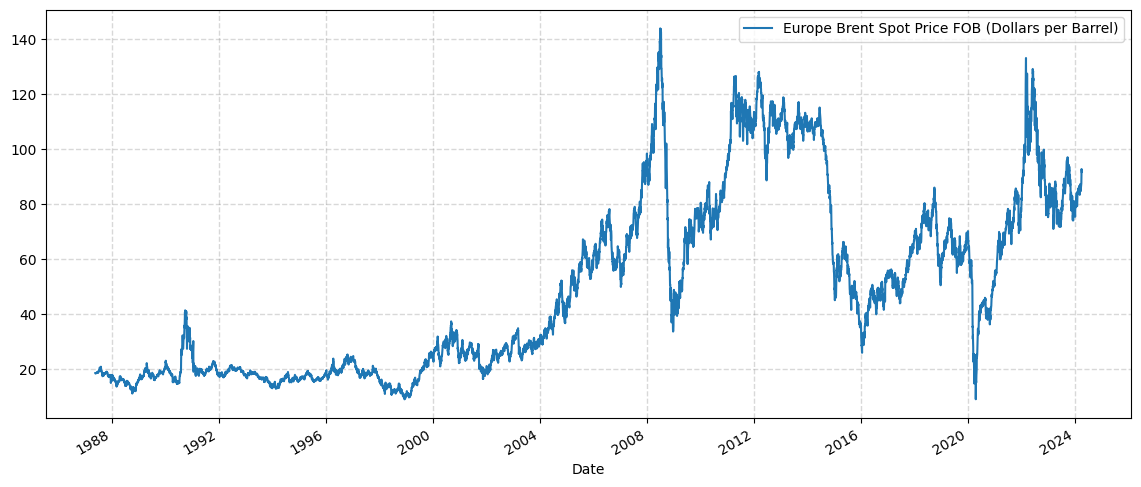

In [19]:
fob.plot(x="Date", y="Europe Brent Spot Price FOB (Dollars per Barrel)", figsize=(14,6))
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()